In [11]:
import numpy as np
import pandas as pd


In [12]:
df = pd.read_csv('Churn_Modelling.csv')

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True) #dropped as they aren't important for us

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)
'''
get_dummies converts the word into a numerical value. this is because geography and gender are nothing but part of X and we do the
dot product of X. we can't do that for the words.
so, in case of geo, germany and spain represented in 0s and 1s. if both 0s, we are talking about france.
in case of gender, male represented in 0s and 1s. if 0, we are talking about female.
'''

In [16]:
df.head() #prints first 5 rows

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X = df.drop(columns=['Exited']) # all columns except the 'Exited' one
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
'''
test size being 0.2 means out of say 1000 datapoints, 80% are used for training and 20% is unseen data which is directly used during
the testing phase.
X_test is never used in training. it is used during the testing phase.
'''

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
'''
scaler is used when values like salary are very high and other values are very low. scaler brings down all the values in a specific
scale like b/w 0 and 1. so, salary comes between 0 and 1.
it is used so that high values do not get dominated during training and all the values of other features have an equal say.
'''
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense #Dense is nothing but layer

In [20]:
model = Sequential() #layers (i/p layer, hidden layers, o/p layer) are added in sequence, one after the other. so sequential a is model type

model.add(Dense(11,activation='sigmoid',input_dim=11))
'''
11 nodes, sigmoid used and input layer has 11 features.
'''
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
'''
we are using bin cross ent as our loss function. we added accuracy as metric. so, at each epoch, we will get to see the loss,
acc, and because we split the data, we see the val_loss and val_acc too.
val_acc is nothing but acc after an epoch. so, say we have 100 datapoints in the validation set and 90 got predicted correctly. so
0.9 being the val_acc.
we don't use the validation data during training. so how come we are able to calculate its accuracy after every epoch?
the training data is used for weight updation. but, during the training, we also use valid data. we don't update its weights
but we treat it as the new data. so after completion of the epoch, test data taken and just like how we would use the new unseen
data for acc calculations, we will use the validation data too for the same. we would get y_cap for each test data.
now, this y_cap is used for calculating acc and is also feeded to the log loss function of the bin cross ent.
'''

In [23]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3001 - loss: 0.7983 - val_accuracy: 0.7969 - val_loss: 0.5761
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.5549 - val_accuracy: 0.7969 - val_loss: 0.5114
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.5124 - val_accuracy: 0.7969 - val_loss: 0.5007
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.5063 - val_accuracy: 0.7969 - val_loss: 0.4982
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.4967 - val_accuracy: 0.7969 - val_loss: 0.4967
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.4998 - val_accuracy: 0.7969 - val_loss: 0.4957
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7926 - loss: 0.5042 - val_accuracy: 0.7969 - val_loss: 0.4954
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8039 - loss: 0.4882 - val_accu

In [24]:
y_pred = model.predict(X_test)
#x_test which was unseen and did not take part in the training, is now used for predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
y_pred

array([[0.23533124],
       [0.23533124],
       [0.23533124],
       ...,
       [0.23533124],
       [0.23725112],
       [0.23533124]], dtype=float32)

In [26]:
y_pred = y_pred.argmax(axis=-1)
'''
this is when we are using the sigmoid and not step, i.e., when we are getting output as a continuous value between 0 and 1.
argmax will convert the probabilites into classes 0 and 1.
say y predicted some prob which belong to class 1 and some which belong to class 0.
so, by using the argmax, these probabilities will be converted into classes 0 and 1.
if we were using the step function, no need for argmax as y_pred would have been 0 or 1 only.
'''


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
'''
y_test was the 20% of data which was the actual o/p
y_pred is the prediction of 20% of the i/p unseen data
acc = number of correctly pred values / total values
'''


0.7975

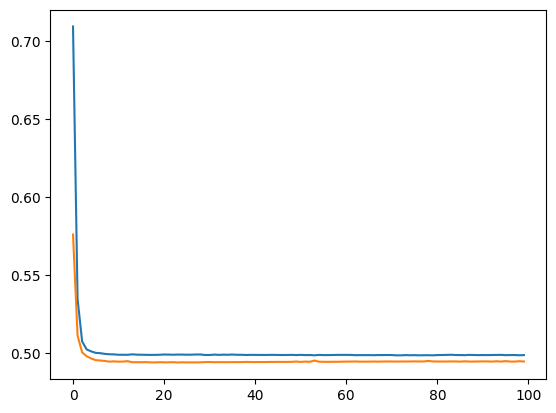

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) #train data log oss function
plt.plot(history.history['val_loss'])# validation data log loss function

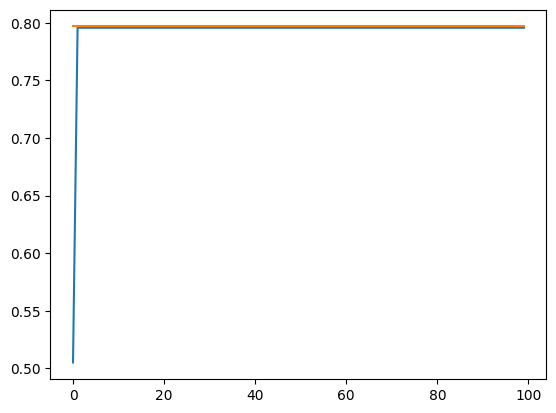

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])